In [ ]:
pip install opencv-python



  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
    --------------------------------------- 0.9/38.1 MB 19.0 MB/s eta 0:00:02
   -- ------------------------------------- 2.5/38.1 MB 26.9 MB/s eta 0:00:02
   ---- ----------------------------------- 4.4/38.1 MB 31.4 MB/s eta 0:00:02
   ------ --------------------------------- 6.2/38.1 MB 33.0 MB/s eta 0:00:01
   -------- ------------------------------- 7.8/38.1 MB 35.3 MB/s eta 0:00:01
   -------- ------------------------------- 8.3/38.1 MB 31.3 MB/s eta 0:00:01
   -------- ------------------------------- 8.5/38.1 MB 25.7 MB/s eta 0:00:02
   -------- ------------------------------- 8.5/38.1 MB 22.6 MB/s eta 0:00:02
   --------- ------------------------------ 9.2/38.1 MB 22.6 MB/s eta 0:00:02
   ---

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#data exploration

In [ ]:
with_mask_images = os.listdir('C:/Users/Administrator/Downloads/Dataset/Dataset/with_mask')
with_mask_images[:10]

In [ ]:
without_mask_images= os.listdir('C:/Users/Administrator/Downloads/Dataset/Dataset/without_mask')
print(without_mask_images[0:5])
print(without_mask_images[-5:])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']
['995.jpg', '996.jpg', '997.jpg', '998.jpg', '999.jpg']


In [ ]:
len(with_mask_images)


5521

In [ ]:
len(without_mask_images)

5521

In [ ]:
#here we will create lables for the images
##with mask =1
#without mask= 0

In [ ]:
# create the labels
with_mask_labels = [1]*5521
without_mask_labels = [0]*5521

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

11042
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


    displaying the images

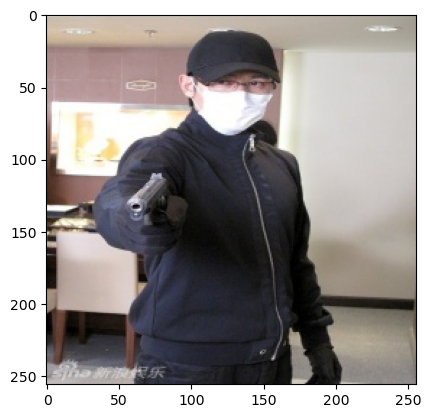

In [ ]:
img = mpimg.imread('C:/Users/Administrator/Downloads/Dataset/Dataset/with_mask/0.jpg')
imgplot = plt.imshow(img)
plt.show()

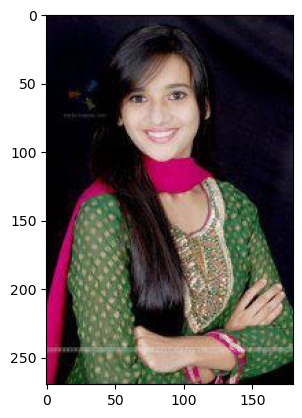

In [ ]:
# displaying without mask image
img = mpimg.imread('C:/Users/Administrator/Downloads/Dataset/Dataset/without_mask/0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# reads each image using PIL, resizes them to 128x128 pixels, converts them to RGB format, converts them into NumPy arrays, and appends them to the data list

In [ ]:
with_mask_path = 'C:/Users/Administrator/Downloads/Dataset/Dataset/with_mask/'

data = []

for img_file in with_mask_images:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'C:/Users/Administrator/Downloads/Dataset/Dataset/without_mask/'


for img_file in without_mask_images:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
data[0]

array([[[234, 228, 224],
        [234, 228, 223],
        [233, 226, 221],
        ...,
        [165, 161, 150],
        [163, 159, 150],
        [162, 158, 150]],

       [[200, 189, 173],
        [200, 190, 173],
        [200, 191, 173],
        ...,
        [163, 159, 148],
        [162, 158, 148],
        [162, 158, 149]],

       [[204, 187, 173],
        [204, 187, 173],
        [205, 188, 174],
        ...,
        [165, 159, 148],
        [164, 157, 147],
        [163, 156, 146]],

       ...,

       [[145, 137, 135],
        [151, 144, 142],
        [179, 172, 171],
        ...,
        [142, 138, 136],
        [139, 135, 134],
        [128, 123, 123]],

       [[179, 170, 168],
        [181, 173, 170],
        [185, 177, 175],
        ...,
        [143, 139, 136],
        [140, 136, 133],
        [134, 130, 128]],

       [[197, 190, 187],
        [197, 189, 186],
        [196, 188, 185],
        ...,
        [142, 138, 135],
        [142, 138, 135],
        [137, 133, 130]]

In [ ]:
len(data)

11042

In [ ]:
len(labels)

11042

In [ ]:
#converting data and labels into numpy array
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X)
print(Y)

[[[[234 228 224]
   [234 228 223]
   [233 226 221]
   ...
   [165 161 150]
   [163 159 150]
   [162 158 150]]

  [[200 189 173]
   [200 190 173]
   [200 191 173]
   ...
   [163 159 148]
   [162 158 148]
   [162 158 149]]

  [[204 187 173]
   [204 187 173]
   [205 188 174]
   ...
   [165 159 148]
   [164 157 147]
   [163 156 146]]

  ...

  [[145 137 135]
   [151 144 142]
   [179 172 171]
   ...
   [142 138 136]
   [139 135 134]
   [128 123 123]]

  [[179 170 168]
   [181 173 170]
   [185 177 175]
   ...
   [143 139 136]
   [140 136 133]
   [134 130 128]]

  [[197 190 187]
   [197 189 186]
   [196 188 185]
   ...
   [142 138 135]
   [142 138 135]
   [137 133 130]]]


 [[[238 239 241]
   [238 239 241]
   [237 238 240]
   ...
   [206 179 191]
   [203 175 187]
   [202 174 186]]

  [[238 239 241]
   [238 239 241]
   [237 238 240]
   ...
   [208 181 192]
   [205 177 189]
   [203 175 187]]

  [[238 239 241]
   [238 239 241]
   [238 239 241]
   ...
   [209 182 193]
   [205 177 189]
   [204 176

In [ ]:
print(X.shape)
print(Y.shape)

(11042, 128, 128, 3)
(11042,)


In [ ]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(11042, 128, 128, 3) (8833, 128, 128, 3) (2209, 128, 128, 3)


In [ ]:
# scaling the data to convert all pixel values between 0 and 1. MOdel performs better when the valuesare between 0and 1

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.03137255, 0.03137255, 0.03137255],
        [0.03921569, 0.03921569, 0.03921569],
        [0.05098039, 0.05098039, 0.05098039],
        ...,
        [0.08235294, 0.08235294, 0.08235294],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.06666667, 0.06666667, 0.06666667]],

       [[0.02352941, 0.02352941, 0.02352941],
        [0.02745098, 0.02745098, 0.02745098],
        [0.04313725, 0.04313725, 0.04313725],
        ...,
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.07058824, 0.07058824, 0.07058824],
        [0.0745098 , 0.0745098 , 0.0745098 ]],

       [[0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.06666667, 0.06666667, 0.06666667],
        [0.08235294, 0.08235294, 0.08235294]],

       ...,

       [[0.85490196, 0.85490196, 0.85490196],
        [0.84705882, 0.84705882, 0.84705882],
        [0.85882353, 0

In [ ]:
#building a CNN
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



In [ ]:
#breakdown of the architecture:

# Input layer: Convolutional layer with 32 filters/kernels, each of size (3,3) using ReLU activation function.
# MaxPooling layer with pool size (2,2) to downsample the output of the previous layer.
# Convolutional layer with 64 filters/kernels, each of size (3,3) using ReLU activation function.
# MaxPooling layer with pool size (2,2) to downsample the output of the previous layer.
# Flatten layer to convert the 2D matrix data into a vector for dense layers.
# Dense (fully connected) layer with 128 neurons using ReLU activation function.
# Dropout layer with a dropout rate of 0.5 to prevent overfitting.
# Dense layer with 64 neurons using ReLU activation function.
# Another Dropout layer with a dropout rate of 0.5.
# Output layer with the number of neurons equal to the number of classes (2 in this case) using a sigmoid activation function since you're dealing with binary classification.

In [ ]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# Training the Model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5


249/249 [==============================] - 61s 237ms/step - loss: 0.2911 - acc: 0.8927 - val_loss: 0.1484 - val_acc: 0.9604
Epoch 2/5
249/249 [==============================] - 60s 240ms/step - loss: 0.1438 - acc: 0.9555 - val_loss: 0.1288 - val_acc: 0.9525
Epoch 3/5
249/249 [==============================] - 58s 234ms/step - loss: 0.1030 - acc: 0.9659 - val_loss: 0.1000 - val_acc: 0.9683
Epoch 4/5
249/249 [==============================] - 59s 236ms/step - loss: 0.0870 - acc: 0.9728 - val_loss: 0.1128 - val_acc: 0.9661
Epoch 5/5
249/249 [==============================] - 59s 236ms/step - loss: 0.0835 - acc: 0.9726 - val_loss: 0.1229 - val_acc: 0.9638


In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

70/70 [==============================] - 3s 42ms/step - loss: 0.1357 - acc: 0.9656
Test Accuracy = 0.9655953049659729


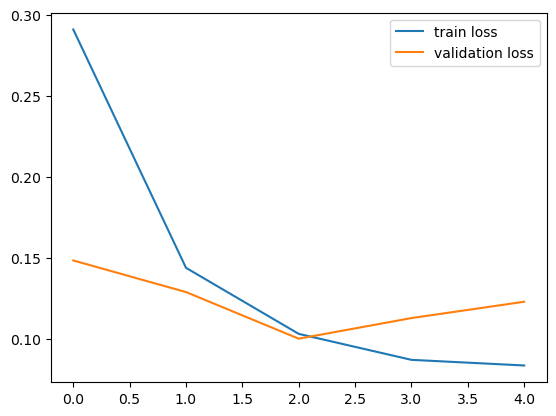

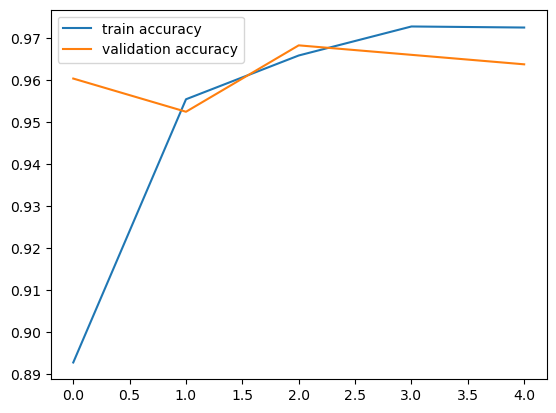

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: C:/Users/Administrator/Downloads/imagetest1.jpg


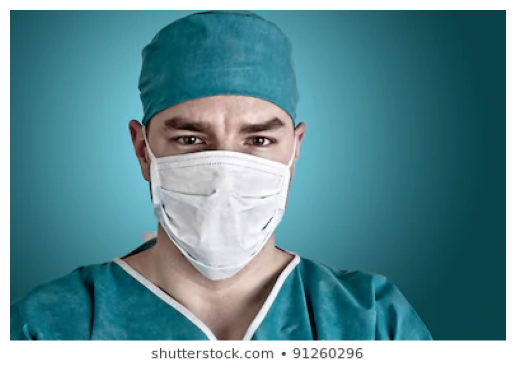

1/1 [==============================] - 0s 24ms/step
[[0.00378713 0.9993854 ]]
1
The person in the image is wearing a mask


In [ ]:
#Classifying images using the model

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Display the input image using Matplotlib
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255.0

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

Path of the image to be predicted: C:/Users/Administrator/Downloads/imagetest2.jpg


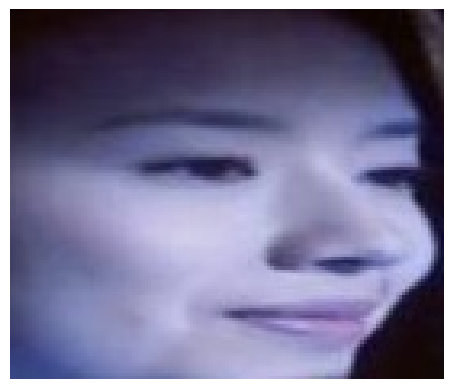

1/1 [==============================] - 0s 24ms/step
[[0.8842011  0.04500266]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Display the input image using Matplotlib
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255.0

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')